In [1]:
import pandas as pd
import scanpy as sc
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import random
import numpy as np


[Executed on 2023-09-21 14:08:15.282637]


In [2]:
adata=sc.read_h5ad("/proj/sensoryaging/data/data/up_dated_data/SGNs/final_with_neuronV.h5ad")

[Executed on 2023-09-21 14:09:27.126386]


In [3]:
adata

[Executed on 2023-09-21 14:09:32.789272]


AnnData object with n_obs × n_vars = 2954 × 33241
    obs: 'sample_ID_Plate', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'doublet_scores', 'predicted_doublets', 'sex', 'leiden_new', 'leiden_old', 'leiden_0', 'leiden_2'
    var: 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'hvg', 'leiden', 'leiden_2_colors', 'leiden_colors', 'leiden_new_colors', 'leiden_old_colors', 'leiden_sub_colors', 'log1p', 'neighbors', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap', 'X_umapOriginal'
    layers: 'Scale', 'log1p', 'umi'
    obsp: 'connectivities', 'distances'

[Executed on 2023-09-21 14:09:32.850118]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


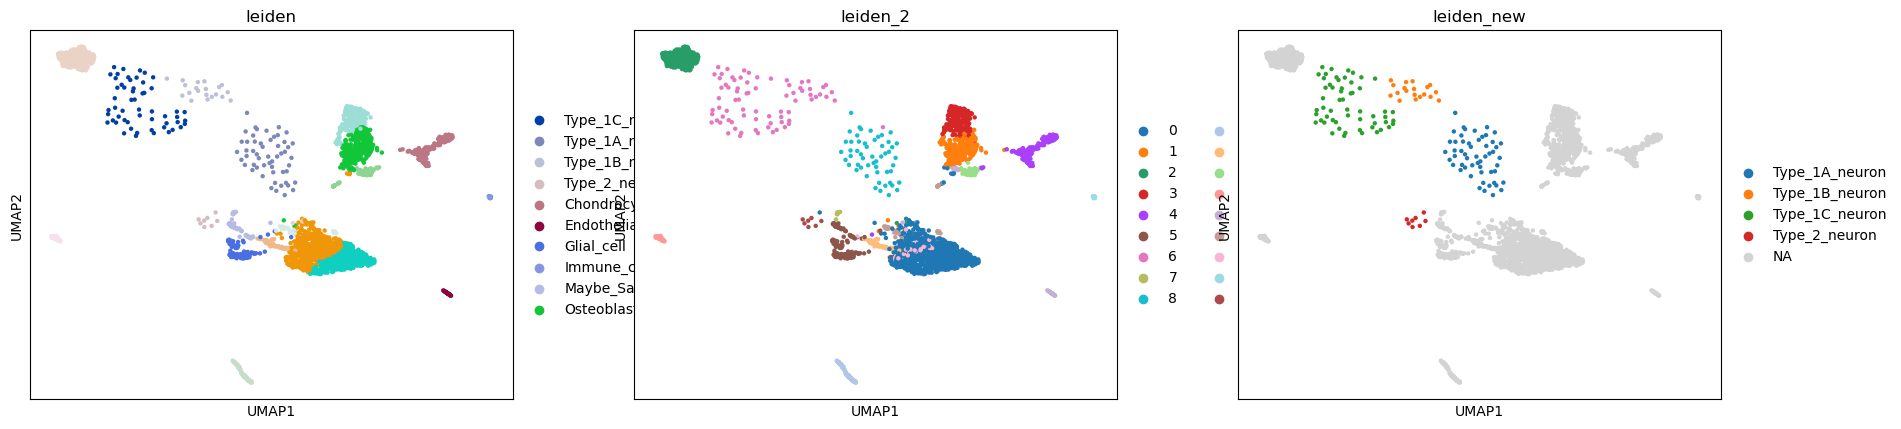

In [4]:
sc.pl.umap(adata,color=['leiden','leiden_2','leiden_new'],layer='log1p')

In [5]:
adata.obs['leiden'].value_counts()

[Executed on 2023-09-21 14:09:34.800471]


leiden
Schwann_cell              564
Schwann_cell_2            445
Osteoblasts               370
Schwann                   306
Unknown                   249
Chondrocytes              204
Glial_cell                129
Satelite/Glial_cell       122
Satelite_unknown           93
Osteoclasts_2              91
Maybe_Satelite             78
Unknown_satelite/Glial     63
Type_1C_neuron             55
Type_1A_neuron             54
Unknown_2                  41
Endothelial                40
Immune_cell                22
Type_1B_neuron             20
Type_2_neuron               8
Name: count, dtype: int64

[Executed on 2023-09-21 14:09:34.856018]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


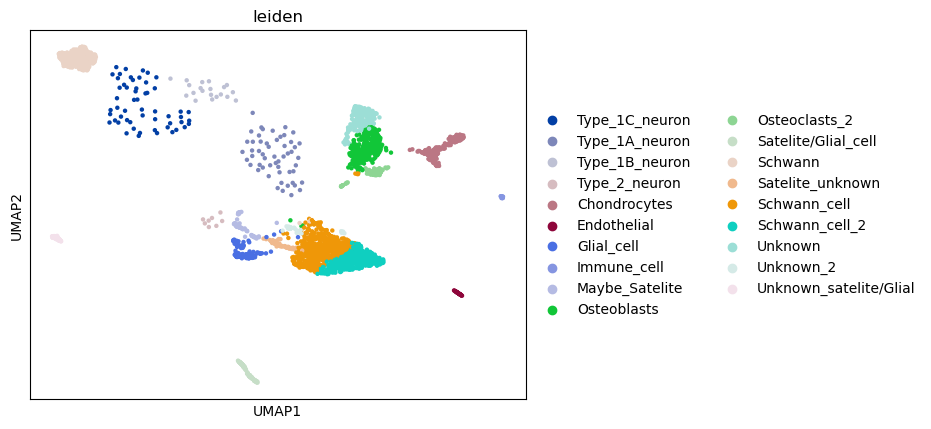

In [6]:
sc.pl.umap(adata,color='leiden')

In [7]:
adata.obs['leiden'].value_counts()

[Executed on 2023-09-21 14:09:35.376466]


leiden
Schwann_cell              564
Schwann_cell_2            445
Osteoblasts               370
Schwann                   306
Unknown                   249
Chondrocytes              204
Glial_cell                129
Satelite/Glial_cell       122
Satelite_unknown           93
Osteoclasts_2              91
Maybe_Satelite             78
Unknown_satelite/Glial     63
Type_1C_neuron             55
Type_1A_neuron             54
Unknown_2                  41
Endothelial                40
Immune_cell                22
Type_1B_neuron             20
Type_2_neuron               8
Name: count, dtype: int64

In [8]:
withoutneuron=adata[adata.obs['leiden'].isin([])]

[Executed on 2023-09-21 14:09:35.428341]


In [9]:
cell_type_markers={
    'Immune cells': ['Cd74',
  'H2-Ab1',
  'H2-Aa',
  'H2-Eb1',
  'Fxyd5',
  'Lyz2',
  'Ms4a6c',
  'Plbd1',
  'Lgals3'],
 'Macrophage': ['Tyrobp',
  'Fcer1g',
  'Ctss',
  'Cst3',
  'Laptm5',
  'Cd68',
  'H2-DMb1',
  'Ctsz',
  'Ftl1',
  'Aif1',
  'Csf1r',
  'Psap',
  'Cd74'],
 'Sensory Satelite Glial cells': ['Bcan',
  'Fdps',
  'Mlc1',
  'Gja1',
  'Ednrb',
  'Slc1a3',
  'Gbp2',
  'Fabp7',
  'Bcan',
  'Fbln2',
  'Fbln5',
  'Kcnj10',
  'Cdh19',
  'Trpm3',
  'Slc12a2',
  'Stat3',
  'Mapk3',
  'Gja1',
  'Cxcr4',
  'Col28a1',
  'Adamts5',
  'Bcan',
  'Fbln2',
  'Sdc3'],
 'General resident SGC': ['Scn7a', 'Kcna1', 'Anxa1'],
 'Sympathetic Satelite glial cell': ['Lipg', 'Scd2', 'Acsbg1', 'Naaa'],
 'Schwann cell': ['Art3',
  'Gpm6b',
  'Pmp22',
  'Kcna1',
  'Plp1',
  'Fxyd1',
  'Prnp',
  'Matn2',
  'Cryab',
  'Cadm4',
  'Csrp1',
  'Cd9',
  'Sox10',
  'Ncmap',
  'Mag',
  'Mog',
  'Fabp5',
  'Fabp7'],
 'Myeloids Schwann cells': ['Kcna1', 'Kcna2', 'Cacna2d1', 'Slc12a2'],
 'Non myeloids Schwann cells': ['Kcna1',
  'Kcna2',
  'Kcna6',
  'Scn7a',
  'Cacna2d1',
  'Slc12a2'],
 'Endothelial cells': ['Fabp4',
  'Aqp7',
  'Scgb3a1',
  'Star',
  'Pglyrp1',
  'Lcn2',
  'Tmem100',
  'Fbln5',
  'Bmx',
  'Bgn',
  'Stmn2',
  'Alpl',
  'Gkn3',
  'Rad54b',
  'Car4',
  'Tmsb10',
  'Slc22a8',
  'Slc16a1',
  'Ttyh2',
  'Alkbh5',
  'Pam',
  'Vwf',
  'Icam1',
  'Vcam1',
  'Irf1']
}

[Executed on 2023-09-21 14:09:35.532986]


In [10]:
adata_gene=adata.var_names.tolist()
updated_markers={}
for cell_type, genes in cell_type_markers.items():
    valid_genes= [gene for gene in genes if gene in adata_gene]

    if valid_genes:
        updated_markers[cell_type] = valid_genes

cell_type_markers=updated_markers


[Executed on 2023-09-21 14:09:35.590687]


In [11]:
cell_type_markers

[Executed on 2023-09-21 14:09:35.671924]


{'Immune cells': ['Cd74',
  'H2-Ab1',
  'H2-Aa',
  'H2-Eb1',
  'Fxyd5',
  'Lyz2',
  'Ms4a6c',
  'Plbd1',
  'Lgals3'],
 'Macrophage': ['Tyrobp',
  'Fcer1g',
  'Ctss',
  'Cst3',
  'Laptm5',
  'Cd68',
  'H2-DMb1',
  'Ctsz',
  'Ftl1',
  'Aif1',
  'Csf1r',
  'Psap',
  'Cd74'],
 'Sensory Satelite Glial cells': ['Bcan',
  'Fdps',
  'Mlc1',
  'Gja1',
  'Ednrb',
  'Slc1a3',
  'Gbp2',
  'Fabp7',
  'Bcan',
  'Fbln2',
  'Fbln5',
  'Kcnj10',
  'Cdh19',
  'Trpm3',
  'Slc12a2',
  'Stat3',
  'Mapk3',
  'Gja1',
  'Cxcr4',
  'Col28a1',
  'Adamts5',
  'Bcan',
  'Fbln2',
  'Sdc3'],
 'General resident SGC': ['Scn7a', 'Kcna1', 'Anxa1'],
 'Sympathetic Satelite glial cell': ['Lipg', 'Scd2', 'Acsbg1', 'Naaa'],
 'Schwann cell': ['Art3',
  'Gpm6b',
  'Pmp22',
  'Kcna1',
  'Plp1',
  'Fxyd1',
  'Prnp',
  'Matn2',
  'Cryab',
  'Cadm4',
  'Csrp1',
  'Cd9',
  'Sox10',
  'Ncmap',
  'Mag',
  'Mog',
  'Fabp5',
  'Fabp7'],
 'Myeloids Schwann cells': ['Kcna1', 'Kcna2', 'Cacna2d1', 'Slc12a2'],
 'Non myeloids Schwann cells'

[Executed on 2023-09-21 14:09:35.735180]


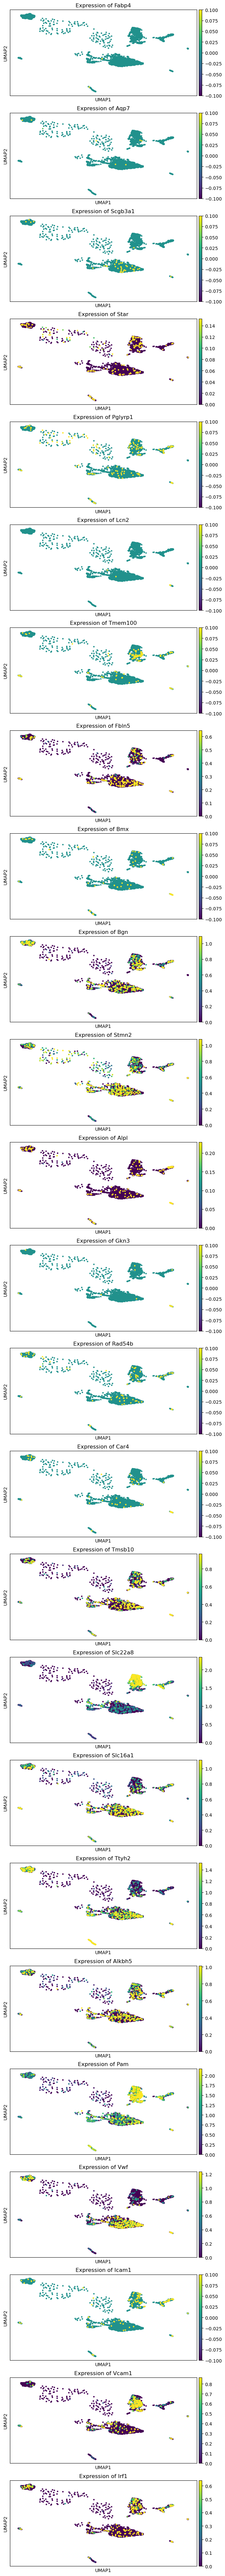

In [12]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

endothelial_markers = cell_type_markers['Endothelial cells']

# Specify the filename for the PDF
pdf_filename = "endothelial_umap_plots.pdf"

with PdfPages(pdf_filename) as pdf:
    # Set up the figure and axes
    fig, axs = plt.subplots(nrows=len(endothelial_markers), figsize=(8, 4 * len(endothelial_markers)))

    # Loop through the endothelial markers and create the UMAP plots
    for i, gene in enumerate(endothelial_markers):
        sc.pl.umap(adata, color=gene, title=f'Expression of {gene}', ax=axs[i], show=False, layer='log1p', vmax='p95')
    
    # Save the entire figure to the PDF
    pdf.savefig(fig)


[Executed on 2023-09-21 14:09:49.667087]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


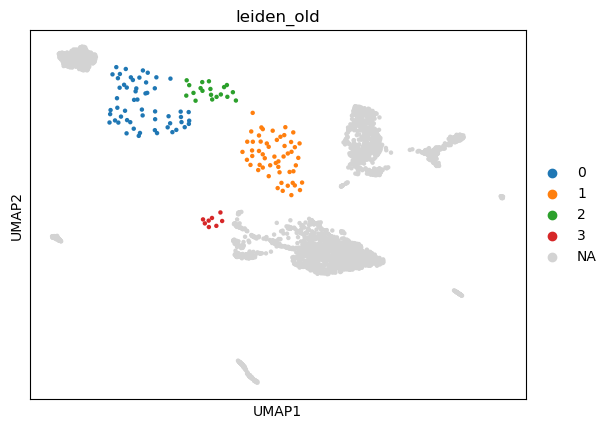

In [13]:
sc.pl.umap(adata,color='leiden_old',layer='log1p')

In [14]:
adata.obs['leiden'].value_counts()

[Executed on 2023-09-21 14:09:49.952643]


leiden
Schwann_cell              564
Schwann_cell_2            445
Osteoblasts               370
Schwann                   306
Unknown                   249
Chondrocytes              204
Glial_cell                129
Satelite/Glial_cell       122
Satelite_unknown           93
Osteoclasts_2              91
Maybe_Satelite             78
Unknown_satelite/Glial     63
Type_1C_neuron             55
Type_1A_neuron             54
Unknown_2                  41
Endothelial                40
Immune_cell                22
Type_1B_neuron             20
Type_2_neuron               8
Name: count, dtype: int64

In [15]:
adata

[Executed on 2023-09-21 14:09:50.008574]


AnnData object with n_obs × n_vars = 2954 × 33241
    obs: 'sample_ID_Plate', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'doublet_scores', 'predicted_doublets', 'sex', 'leiden_new', 'leiden_old', 'leiden_0', 'leiden_2'
    var: 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'hvg', 'leiden', 'leiden_2_colors', 'leiden_colors', 'leiden_new_colors', 'leiden_old_colors', 'leiden_sub_colors', 'log1p', 'neighbors', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap', 'X_umapOriginal'
    layers: 'Scale', 'log1p', 'umi'
    obsp: 'connectivities', 'distances'

In [16]:
# 1. Label the data
adata.obs['endothelial_label'] = np.where(adata.obs['leiden'] == 'Endothelial', 1, 0)

# Get the indices of endothelial and non-endothelial cells
endothelial_indices = adata.obs[adata.obs['endothelial_label'] == 1].index
non_endothelial_indices = adata.obs[adata.obs['endothelial_label'] == 0].sample(len(endothelial_indices)).index


[Executed on 2023-09-21 14:09:50.065944]


In [17]:
import scanpy as sc
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


[Executed on 2023-09-21 14:09:50.127655]


In [18]:
endothelial_positions = [adata.obs.index.get_loc(i) for i in endothelial_indices]
non_endothelial_positions = [adata.obs.index.get_loc(i) for i in non_endothelial_indices]


[Executed on 2023-09-21 14:09:50.183756]


In [19]:
# 2. Split the data
X_train, X_test, y_train, y_test = train_test_split(
    adata.X[np.concatenate([endothelial_positions, non_endothelial_positions])],
    adata.obs['endothelial_label'].iloc[np.concatenate([endothelial_positions, non_endothelial_positions])].values,
    test_size=0.3,
    stratify=adata.obs['endothelial_label'].iloc[np.concatenate([endothelial_positions, non_endothelial_positions])].values,
    random_state=42
)

[Executed on 2023-09-21 14:09:50.239069]


In [20]:
from sklearn.metrics import accuracy_score


# 3. Train the Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

# 4. Assess the performance on the test dataset
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# 5. Predict potential endothelial cells in the entire dataset
adata.obs['predicted_endothelial'] = clf.predict(adata.X)

# 6. Analyze the predictions
# For example, you might want to see how many cells were predicted to be endothelial
predicted_counts = adata.obs['predicted_endothelial'].value_counts()
print(predicted_counts)


[Executed on 2023-09-21 14:09:50.325019]
Accuracy: 1.0000
predicted_endothelial
0    2913
1      41
Name: count, dtype: int64


[Executed on 2023-09-21 14:09:51.362725]


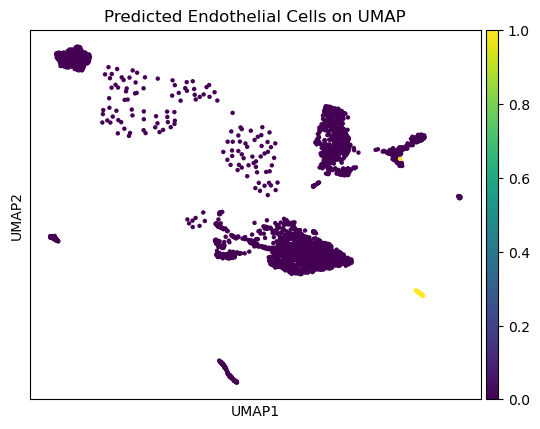

In [21]:
import scanpy as sc

# Visualize the predicted endothelial cells on UMAP
sc.pl.umap(adata, color='predicted_endothelial', title='Predicted Endothelial Cells on UMAP', palette='viridis')


[Executed on 2023-09-21 14:09:51.525531]


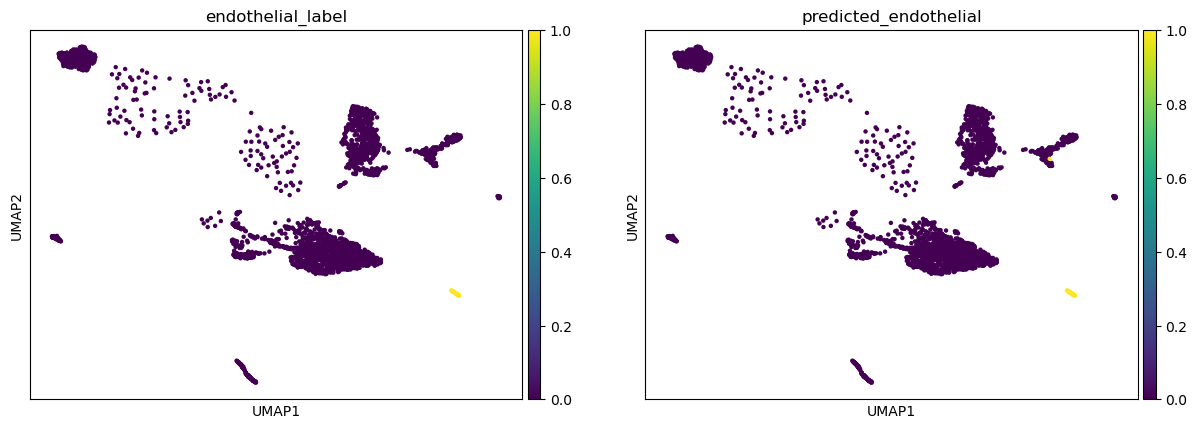

In [22]:
sc.pl.umap(adata,color=['endothelial_label','predicted_endothelial'])

In [23]:
adata.obs['leiden'].value_counts()

[Executed on 2023-09-21 14:09:51.809883]


leiden
Schwann_cell              564
Schwann_cell_2            445
Osteoblasts               370
Schwann                   306
Unknown                   249
Chondrocytes              204
Glial_cell                129
Satelite/Glial_cell       122
Satelite_unknown           93
Osteoclasts_2              91
Maybe_Satelite             78
Unknown_satelite/Glial     63
Type_1C_neuron             55
Type_1A_neuron             54
Unknown_2                  41
Endothelial                40
Immune_cell                22
Type_1B_neuron             20
Type_2_neuron               8
Name: count, dtype: int64

[Executed on 2023-09-21 14:09:51.865124]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


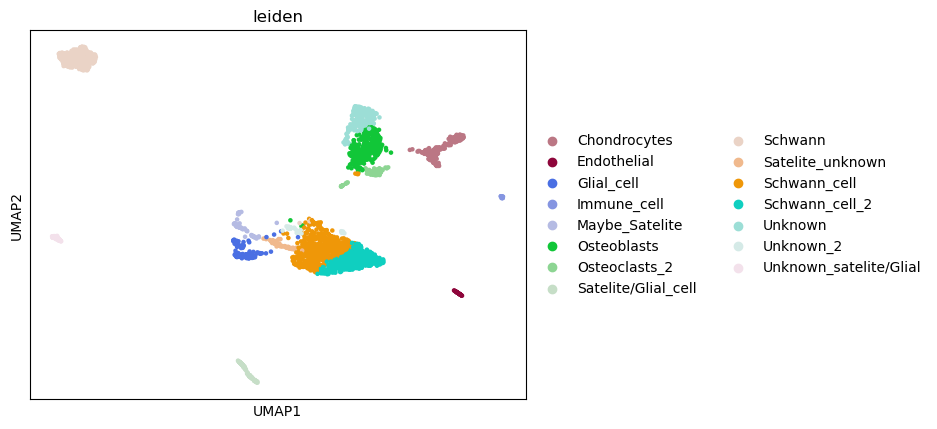

In [24]:
adata_no_neuron=adata[~adata.obs['leiden'].isin(['Type_1B_neuron','Type_2_neuron','Type_1A_neuron','Type_1C_neuron'])]


sc.pl.umap(adata_no_neuron,color=['leiden'])

In [25]:
schwann_markers = cell_type_markers['Schwann cell']

[Executed on 2023-09-21 14:09:52.308226]


[Executed on 2023-09-21 14:09:52.360114]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


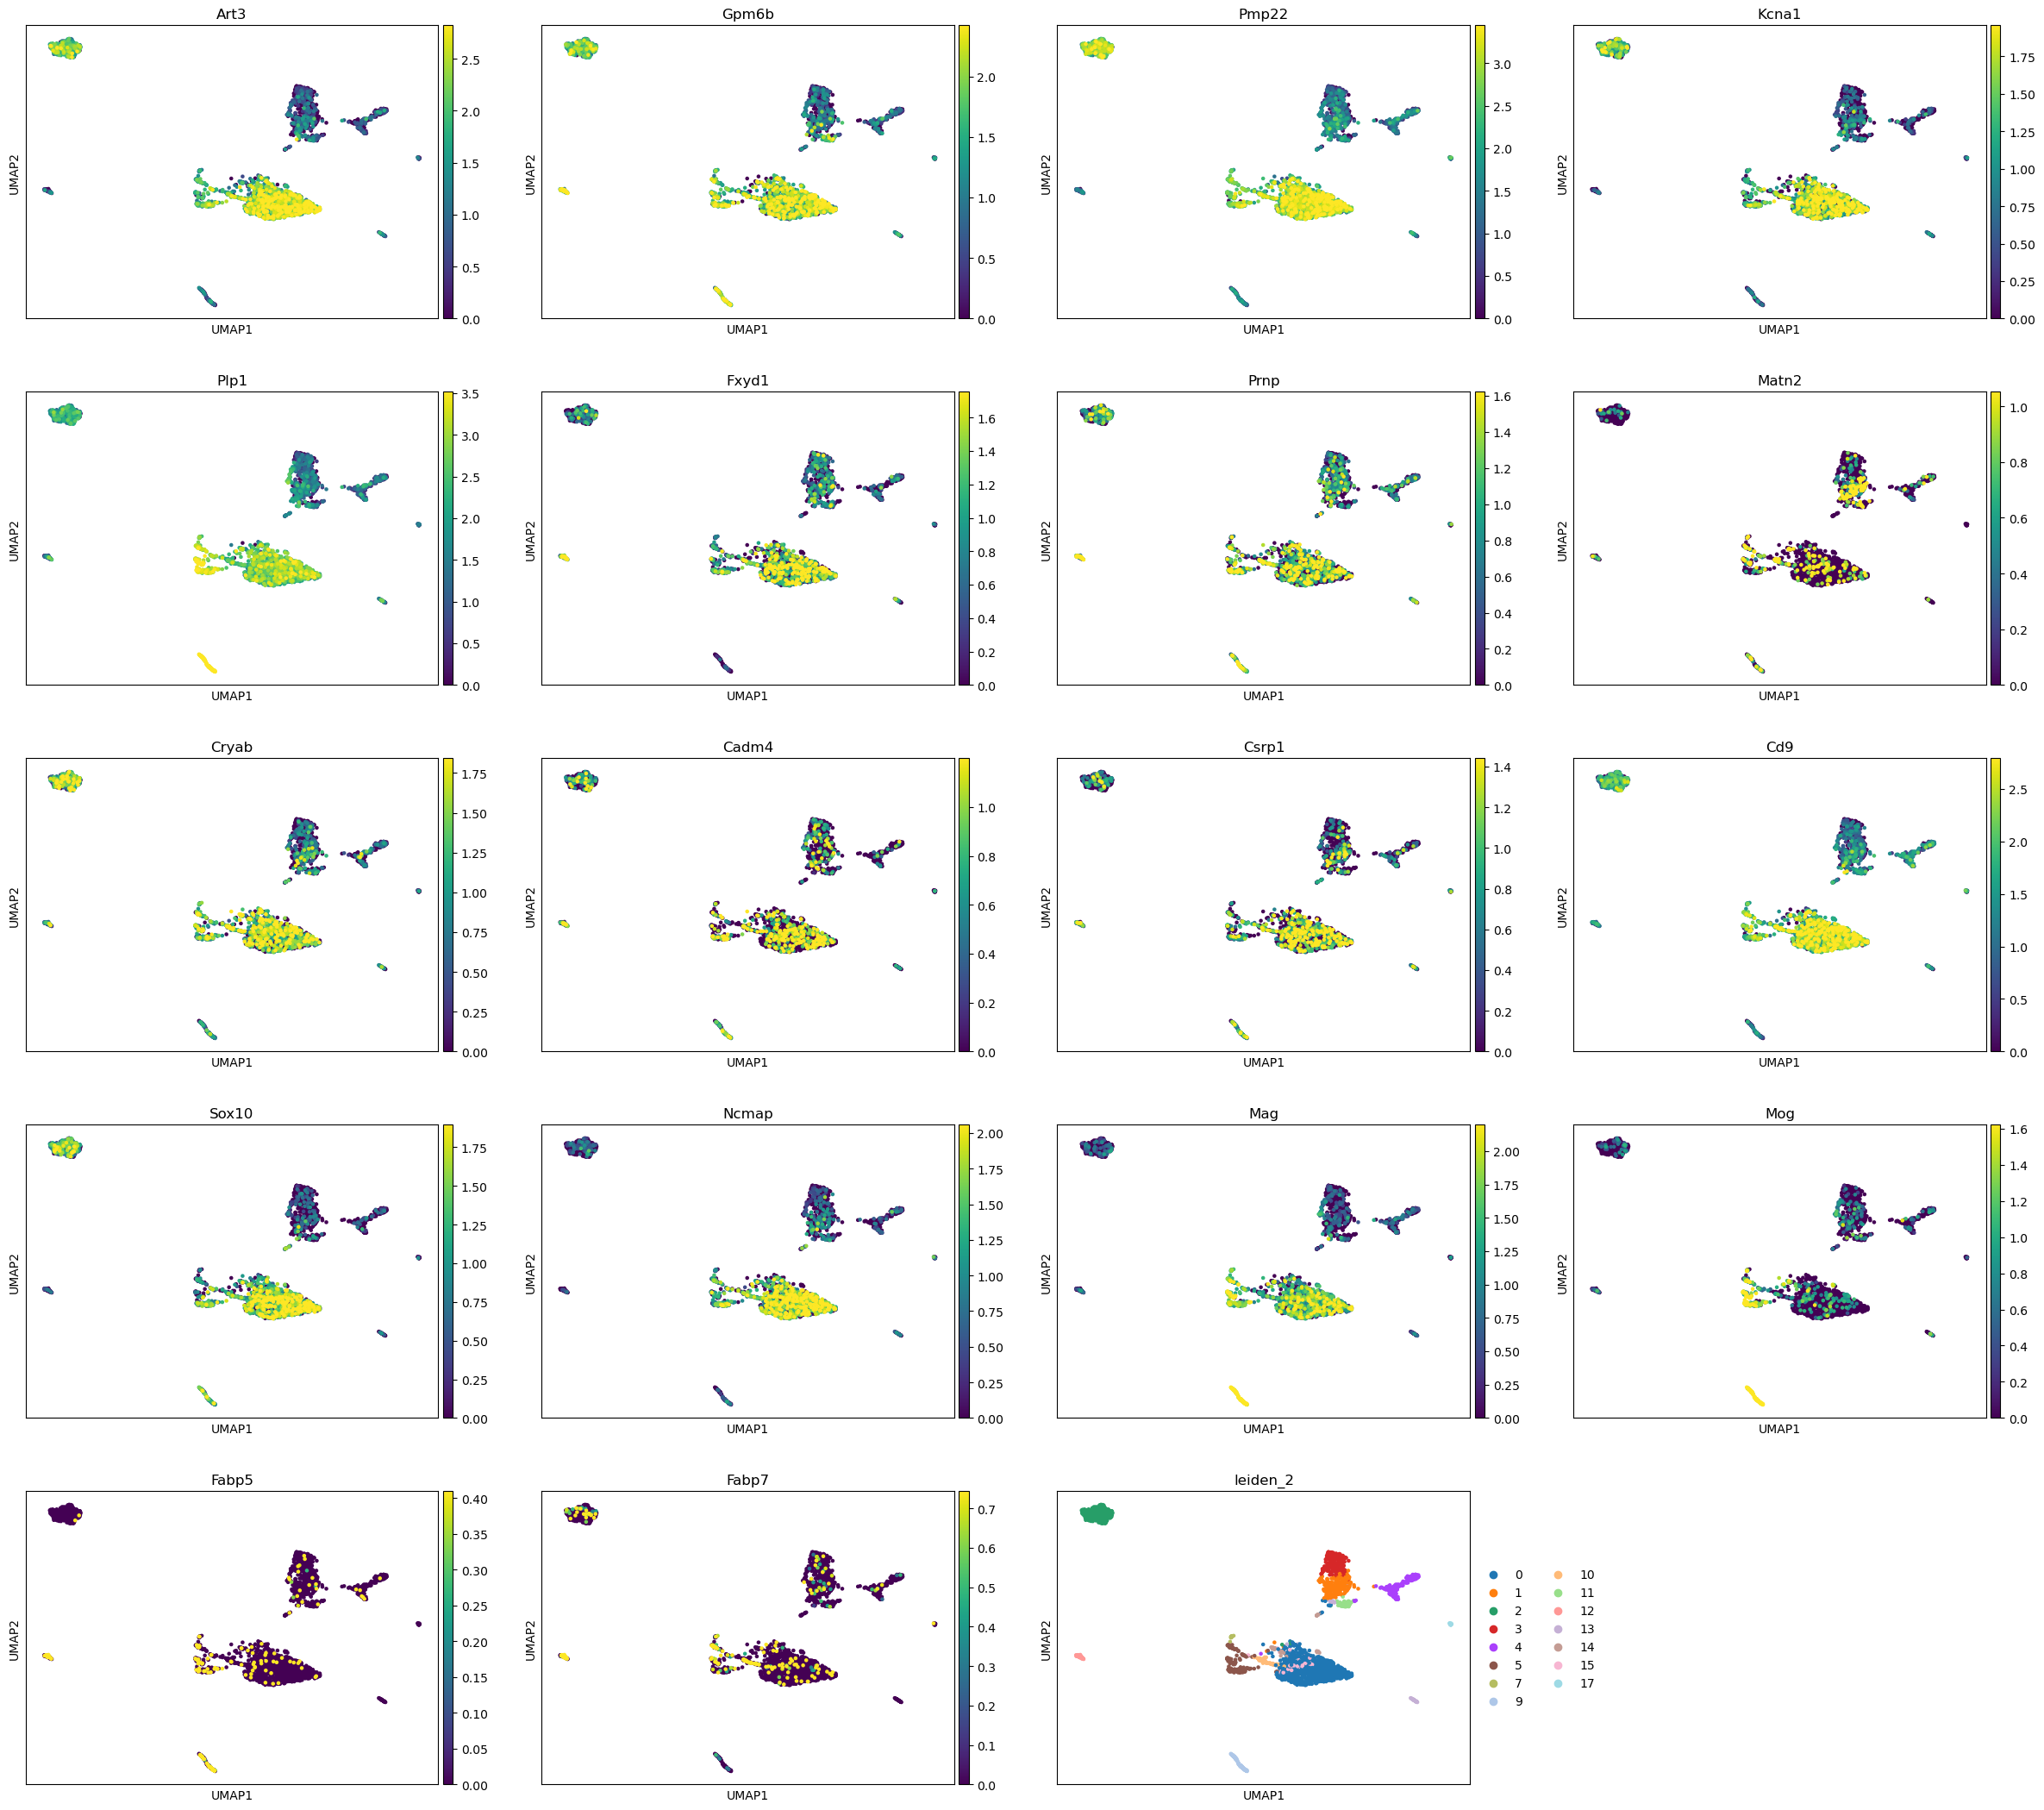

In [26]:
sc.pl.umap(adata_no_neuron,color=(schwann_markers + ['leiden_2']),layer='log1p',vmax='p95',save='schwann_markers.pdf')

In [27]:
adata_no_neuron.var

[Executed on 2023-09-21 14:10:05.974207]


highly_variable  highly_variable_rank      means  \
Gnai3                          False                   NaN   0.660395   
Pbsn                           False                   NaN   0.004249   
Cdc45                          False                   NaN   0.043096   
H19                             True                1450.0   0.051593   
Scml2                          False                   NaN   0.071624   
...                              ...                   ...        ...   
rRNA_rnacentral_330            False                   NaN   0.001821   
rRNA_rnacentral_340            False                   NaN   0.081942   
rRNA_rnacentral_341            False                   NaN  13.488923   
rRNA_rnacentral_342            False                   NaN   0.679211   
rRNA_rnacentral_367            False                   NaN   0.002428   

                      variances  variances_norm      mean       std  
Gnai3                  1.840614        0.752202  0.243244  0.445452  
Pbsn                   0.005446        0.979102  0.001082  0.025505  
Cdc45                  0.065537        0.799300  0.021429  0.136912  
H19                    0.228060        2.248375  0.022748  0.164956  
Scml2                  0.166089        1.107227  0.025687  0.143388  
...                         ...             ...       ...       ...  
rRNA_rnacentral_330    0.001818        0.847892  0.000834  0.021461  
rRNA_rnacentral_340    0.146896        0.833007  0.036209  0.175301  
rRNA_rnacentral_341  543.925120        0.661063  1.920723  0.762237  
rRNA_rnacentral_342    3.037015        1.188822  0.204350  0.393744  
rRNA_rnacentral_367    0.002423        0.810550  0.001460  0.033916  

[33241 rows x 7 columns]

[Executed on 2023-09-21 14:10:06.058054]


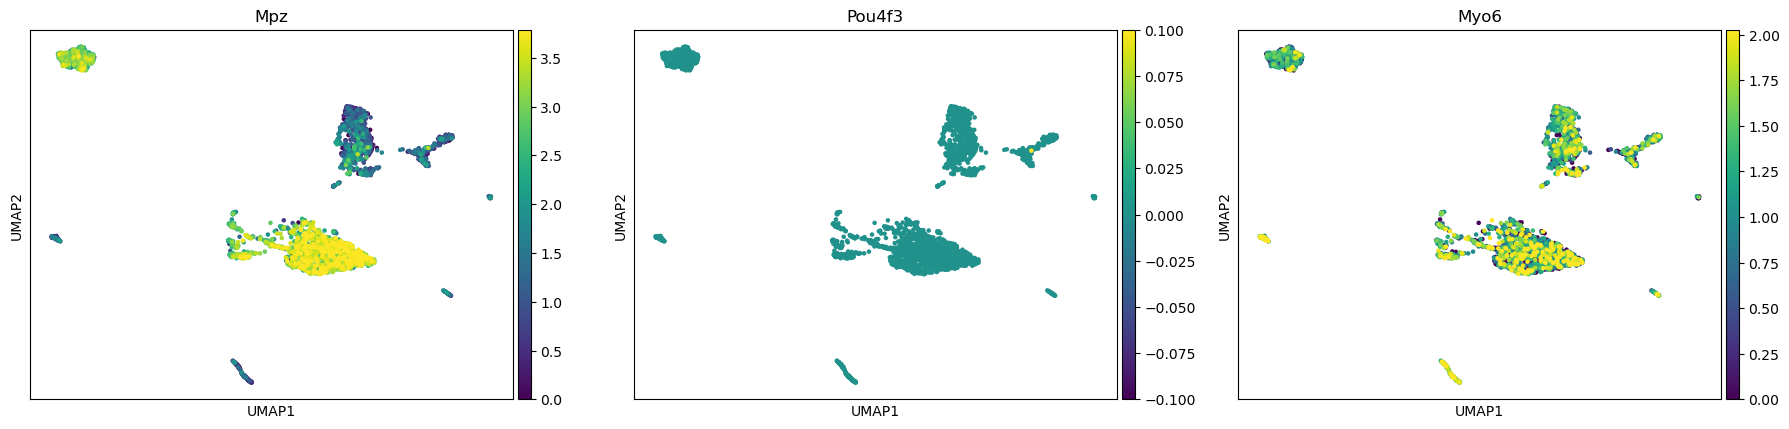

In [28]:
sc.pl.umap(adata_no_neuron,color=['Mpz','Pou4f3','Myo6'],layer='log1p',vmax='p95')

In [29]:
adata_no_neuron

[Executed on 2023-09-21 14:10:07.351147]


View of AnnData object with n_obs × n_vars = 2817 × 33241
    obs: 'sample_ID_Plate', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'doublet_scores', 'predicted_doublets', 'sex', 'leiden_new', 'leiden_old', 'leiden_0', 'leiden_2', 'endothelial_label', 'predicted_endothelial'
    var: 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'hvg', 'leiden', 'leiden_2_colors', 'leiden_colors', 'leiden_new_colors', 'leiden_old_colors', 'leiden_sub_colors', 'log1p', 'neighbors', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap', 'X_umapOriginal'
    layers: 'Scale', 'log1p', 'umi'
    obsp: 'connectivities', 'distances'

[Executed on 2023-09-21 14:10:07.403502]


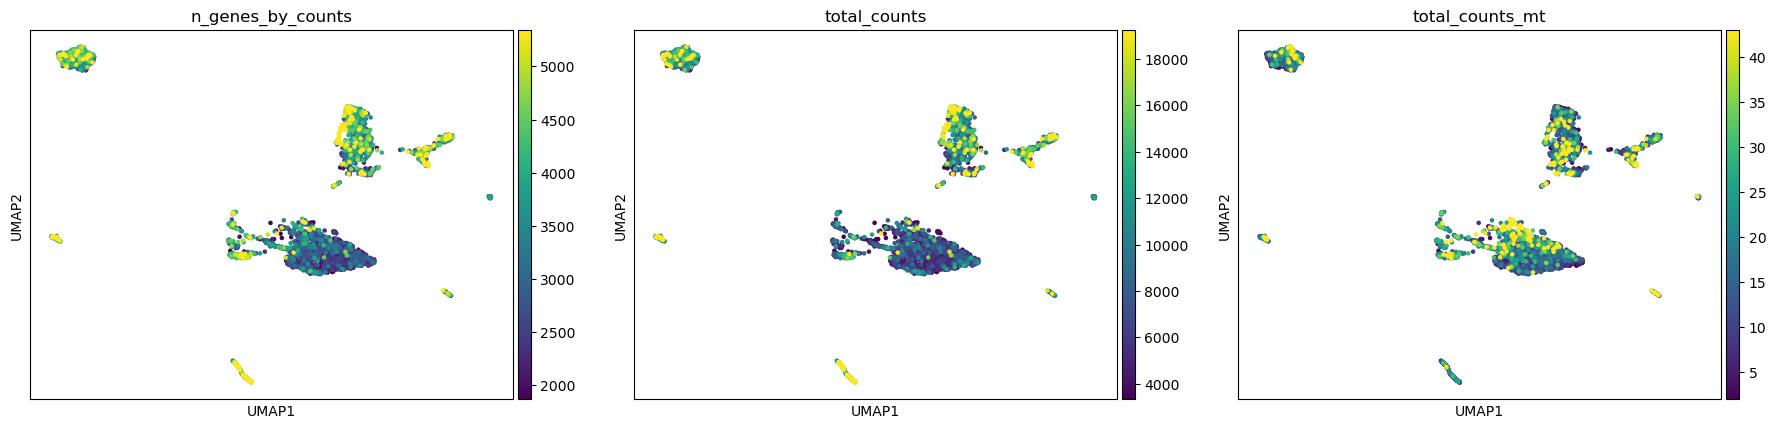

In [30]:
sc.pl.umap(adata_no_neuron,color=['n_genes_by_counts','total_counts','total_counts_mt'],vmin='p5',vmax='p95')

[Executed on 2023-09-21 14:10:08.072473]


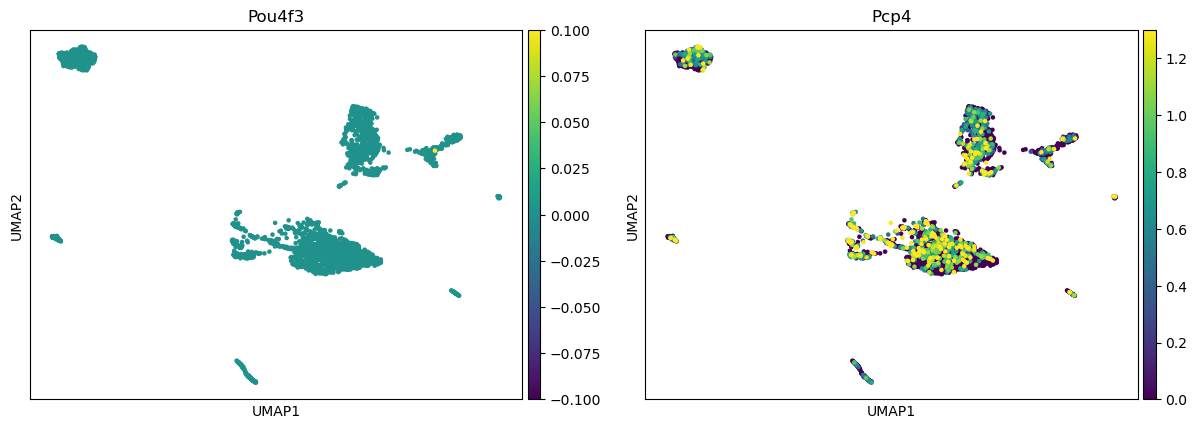

In [31]:
# Hair cell
sc.pl.umap(adata_no_neuron,color=['Pou4f3','Pcp4'],layer='log1p',vmax='p95')

[Executed on 2023-09-21 14:10:08.920508]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


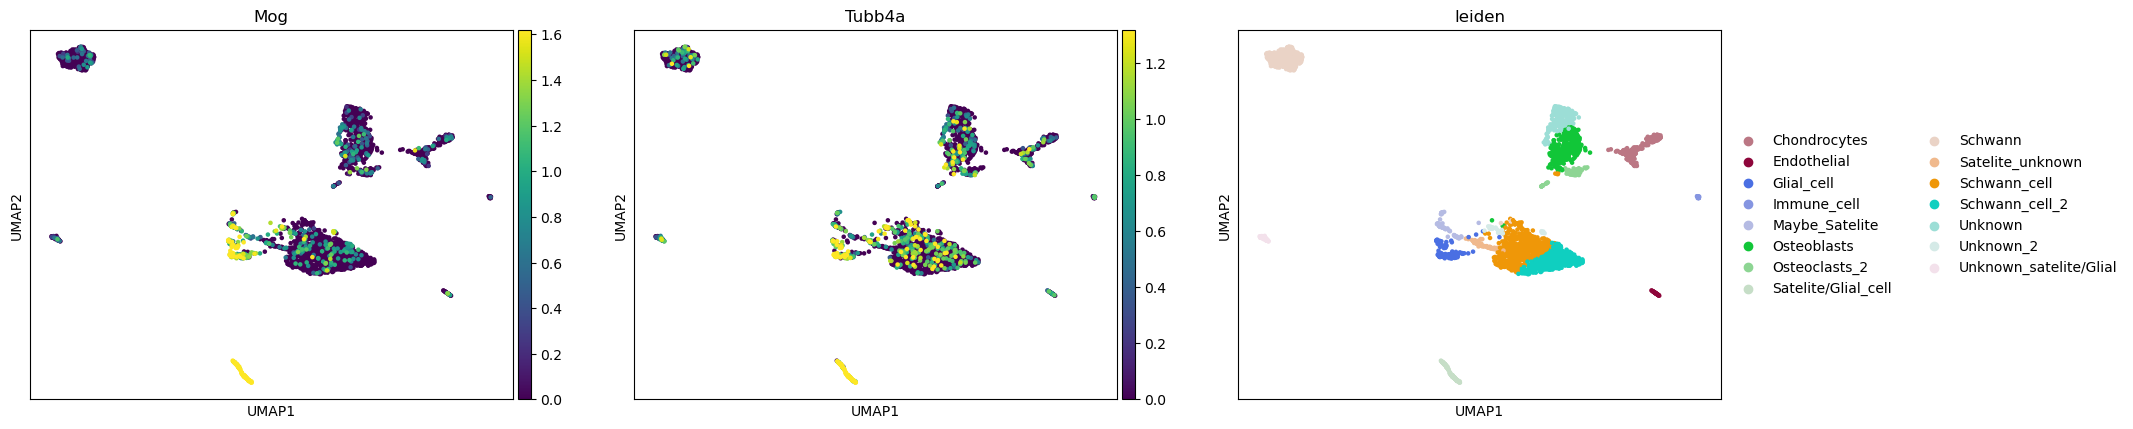

In [32]:
# satellite glial cell 
sc.pl.umap(adata_no_neuron,color=['Mog','Tubb4a','leiden'],layer='log1p',vmax='p95')

[Executed on 2023-09-21 14:10:10.123604]


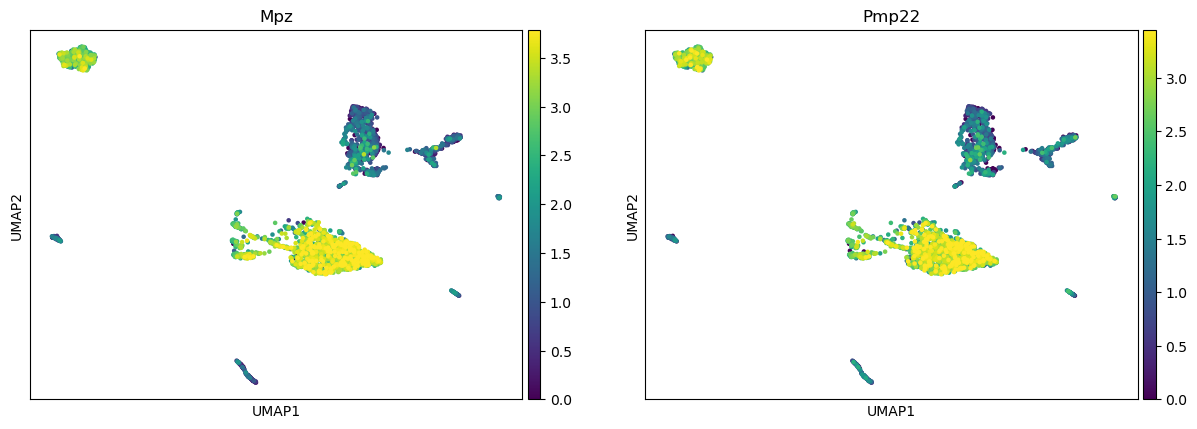

In [33]:
# satellite glial cell 
sc.pl.umap(adata_no_neuron,color=['Mpz','Pmp22'],layer='log1p',vmax='p95')

[Executed on 2023-09-21 14:10:10.883442]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


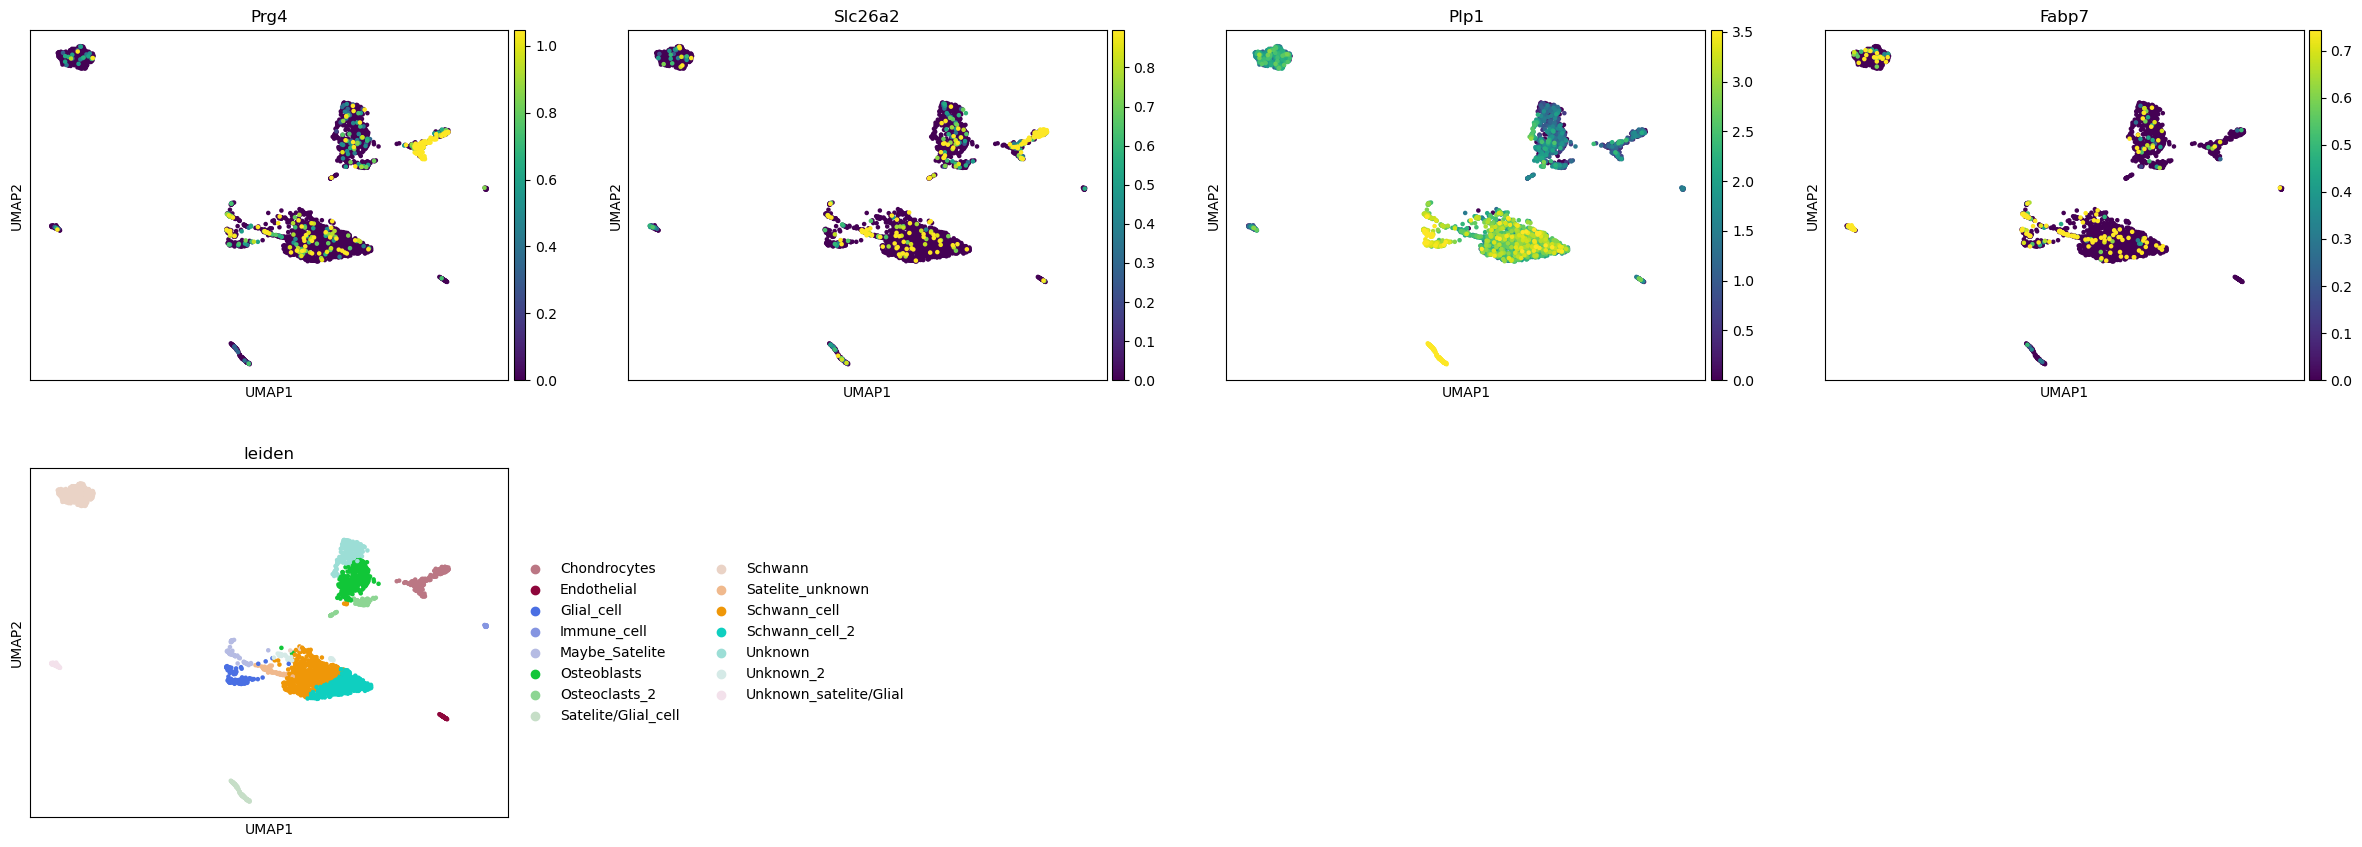

In [34]:
# satellite glial cell 
sc.pl.umap(adata_no_neuron,color=['Prg4','Slc26a2','Plp1','Fabp7','leiden'],layer='log1p',vmax='p95')

[Executed on 2023-09-21 14:10:12.866878]


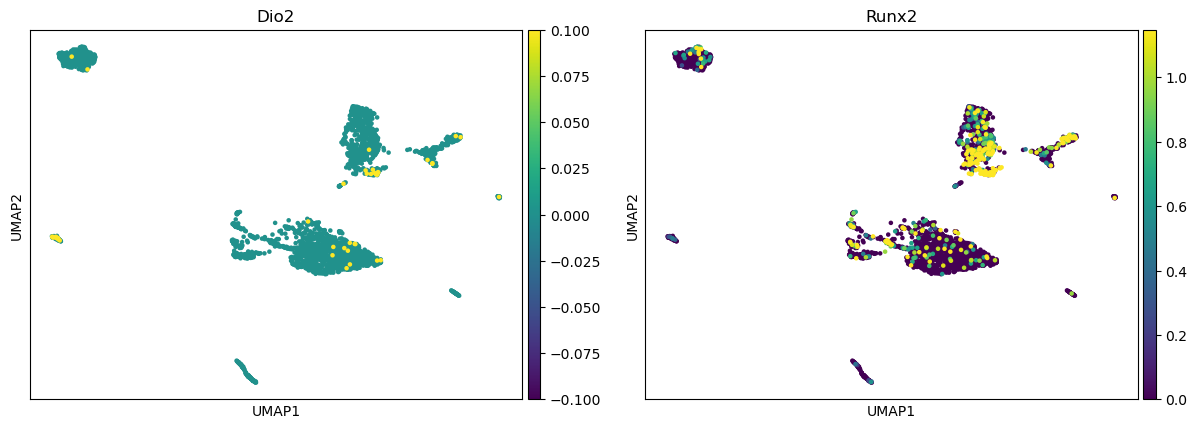

In [35]:
# osteoblast 
sc.pl.umap(adata_no_neuron,color=['Dio2','Runx2'],layer='log1p',vmax='p95')

[Executed on 2023-09-21 14:15:22.725975]


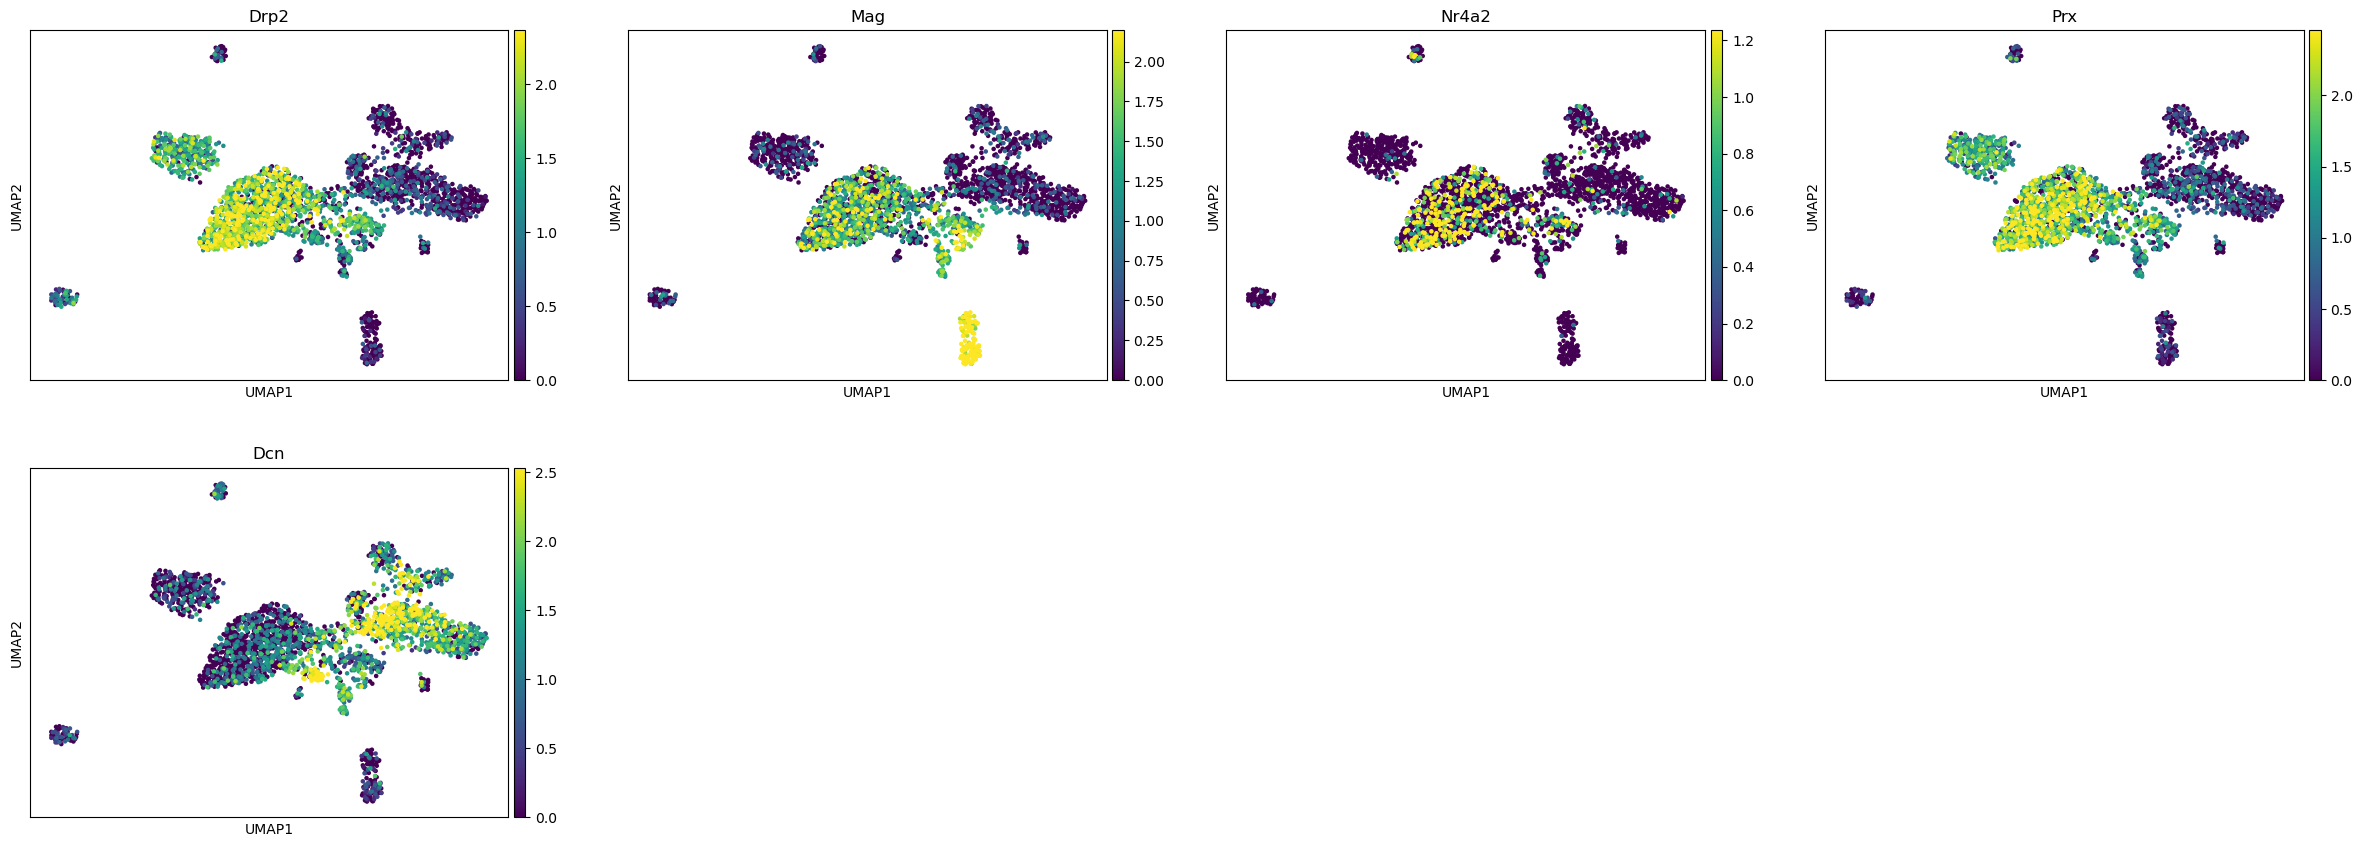

In [46]:
# osteoblast 
sc.pl.umap(adata_no_neuron,color=['Drp2','Mag','Nr4a2','Prx','Dcn'],layer='log1p',vmax='p95')

[Executed on 2023-09-21 14:10:15.851457]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


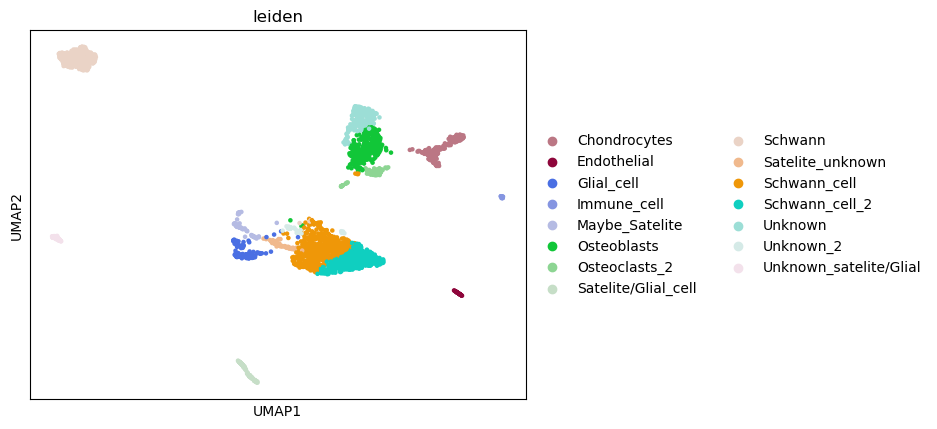

In [37]:
sc.pl.umap(adata_no_neuron,color='leiden')

In [38]:
adata_no_neuron

[Executed on 2023-09-21 14:10:35.853140]


View of AnnData object with n_obs × n_vars = 2817 × 33241
    obs: 'sample_ID_Plate', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'doublet_scores', 'predicted_doublets', 'sex', 'leiden_new', 'leiden_old', 'leiden_0', 'leiden_2', 'endothelial_label', 'predicted_endothelial'
    var: 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'hvg', 'leiden', 'leiden_2_colors', 'leiden_colors', 'leiden_new_colors', 'leiden_old_colors', 'leiden_sub_colors', 'log1p', 'neighbors', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap', 'X_umapOriginal'
    layers: 'Scale', 'log1p', 'umi'
    obsp: 'connectivities', 'distances'

[Executed on 2023-09-21 14:11:22.111591]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packag

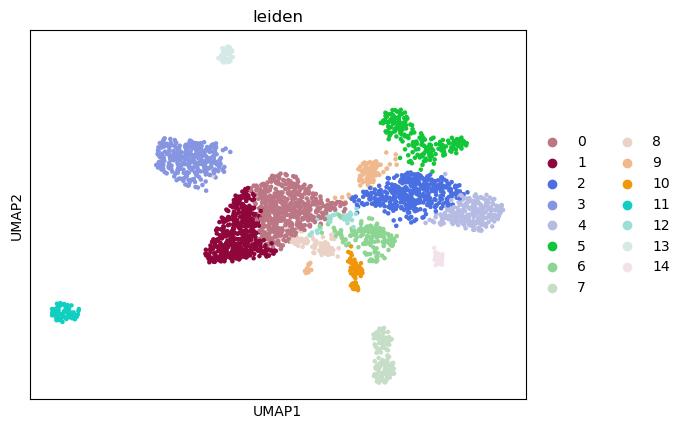

In [39]:
sc.pp.neighbors(adata_no_neuron, n_neighbors=59, n_pcs=15)

sc.tl.leiden(adata_no_neuron,resolution=0.8)

sc.tl.umap(adata_no_neuron,min_dist=0.8)

sc.pl.umap(adata_no_neuron,color=['leiden'],layer='log1p')

[Executed on 2023-09-21 14:12:10.314342]


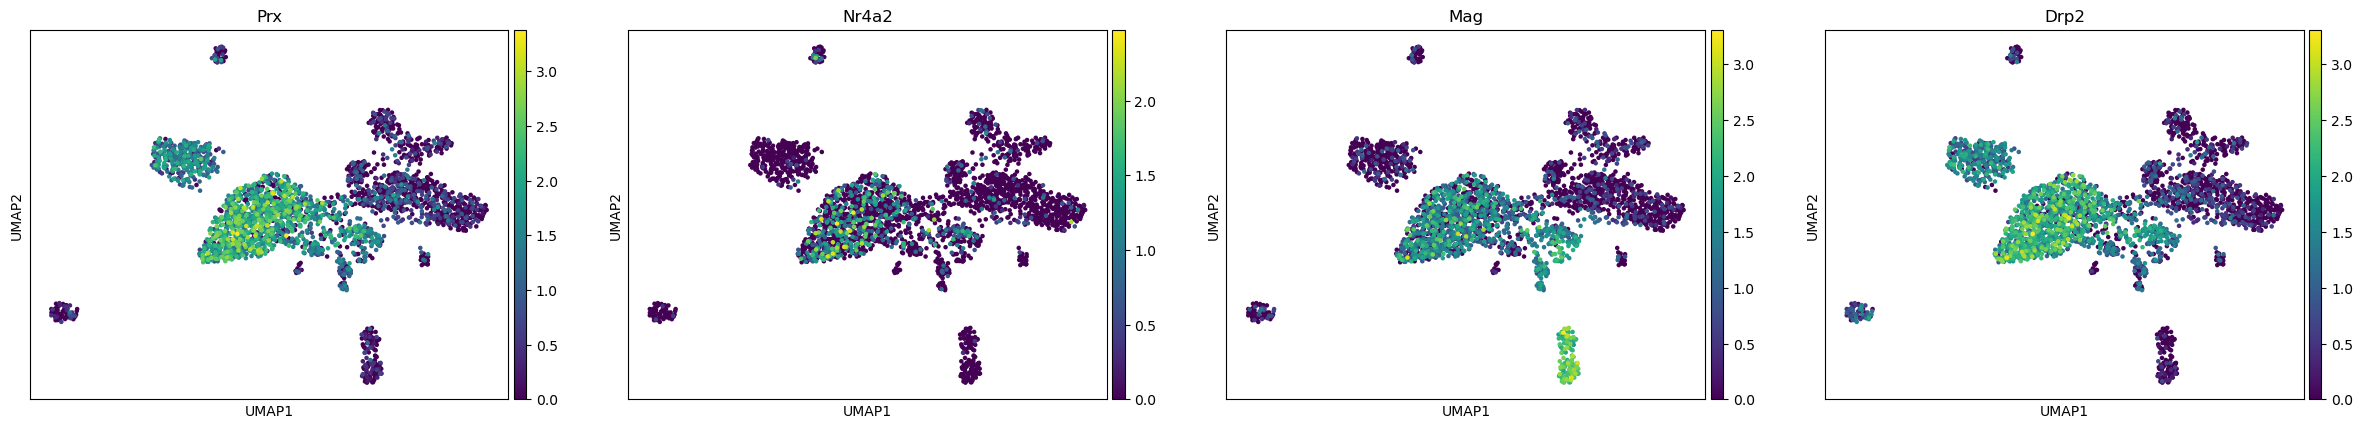

In [40]:
#myeloid Schwann cells (mSCs)
sc.pl.umap(adata_no_neuron,color=['Prx','Nr4a2','Mag','Drp2'],layer='log1p')

[Executed on 2023-09-21 14:39:06.122258]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


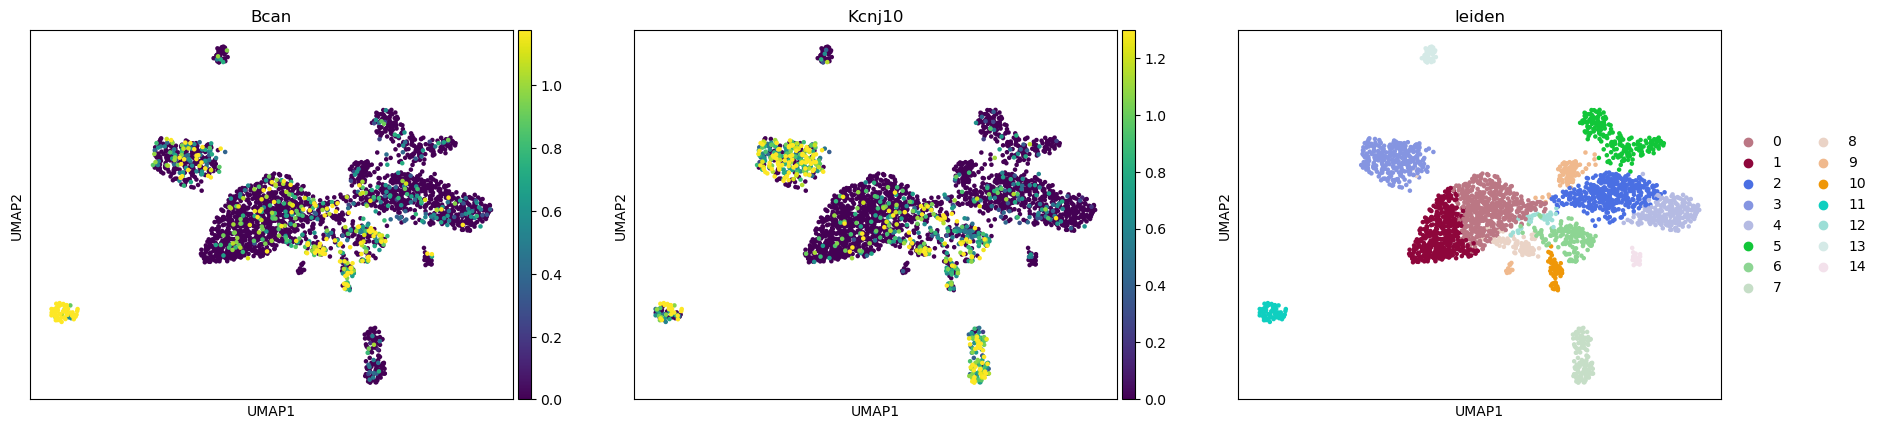

In [51]:
#Satellite glial cells
sc.pl.umap(adata_no_neuron,color=['Bcan','Kcnj10','leiden'],layer='log1p',vmax='p95')

In [48]:
adata_no_neuron

[Executed on 2023-09-21 14:38:35.600351]


AnnData object with n_obs × n_vars = 2817 × 33241
    obs: 'sample_ID_Plate', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'doublet_scores', 'predicted_doublets', 'sex', 'leiden_new', 'leiden_old', 'leiden_0', 'leiden_2', 'endothelial_label', 'predicted_endothelial'
    var: 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'hvg', 'leiden', 'leiden_2_colors', 'leiden_colors', 'leiden_new_colors', 'leiden_old_colors', 'leiden_sub_colors', 'log1p', 'neighbors', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap', 'X_umapOriginal'
    layers: 'Scale', 'log1p', 'umi'
    obsp: 'connectivities', 'distances'

In [52]:
del adata_no_neuron.uns['log1p']
sc.tl.rank_genes_groups(adata_no_neuron, 'leiden', method='t-test')

import pandas as pd
#convert marker genes to dataframe
adata_no_neuron_table=adata_no_neuron.uns['rank_genes_groups']['names']
adata_no_neuron_table=pd.DataFrame(adata_no_neuron_table)
adata_no_neuron_table.head(20)

[Executed on 2023-09-21 14:40:51.666318]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2

0         1         2        3         4              5  \
0       Utrn      Utrn     Cped1    Pde1c   Ranbp3l           Bnc2   
1       Hcn1      Hcn1     Ntrk3  Slc6a15  Slc6a20a          Foxp2   
2        Mpz        Qk  Adamts12    Lama1     Trpm3          Cped1   
3       Aatk       Mpz   Slc6a13    Npas3    Atp1a2          Klf12   
4      Mctp1     Mctp1     Sned1    Trpm3    Prkag2          Dock5   
5      Pmp22  Arhgap24     Cemip    Lrrc7   Slc6a13           Msi2   
6       Art3    Sorcs1     Kcnt1    Slit3    Adam12           Ank2   
7   Arhgap24    Ctnna3     Tmtc4    Mpzl1   Slc22a8           Eya2   
8         Qk     Nfasc   Slc7a11    Hdac9     Ptgds          Tmtc1   
9        Mbp     Gfra1   Slc24a3   Cacnb4      Eya1        Pitpnc1   
10   Fam178b      Fryl      Gjb6    Plcb4     Dock6          Foxp1   
11      Fryl      Art3   Colec12    Sgms1     Sned1         Zbtb7c   
12    Sorcs1   Fam178b    Atp1a2    Ddhd1     Kcnt1          Cald1   
13   Plekha4      Aatk  Mir100hg    Maml2     Aifm3           Etl4   
14      Smtn   Plekha4    Zbtb20   Adgrl3   Colec12           Nebl   
15     Nfasc      Shc4      Ebf2     Dlc1     Mapk4          Ildr2   
16      Il16       Mbp     Ptgds    Fhod3   Slc13a3          Reps2   
17     Gulp1      Il16      Apod      Dmd      Nnat            Fn1   
18       Cd9     Magi2      Eya1   Atrnl1     Aebp1         Phldb2   
19    Ctnna3      Sdk1     Bicc1   Col9a3   Slc13a4  2610307P16Rik   

             6              7        8        9       10        11       12  \
0         Plp1        Slc24a2     Gfap    Zfhx4     Meg3    Adgrb3     Dlg2   
1      Slc24a2           Map7     Aqp4   Zbtb20    Fgf12     Cntn1     Coch   
2   St6galnac3          Lrp1b     Apoe     Ebf1  Slc24a2    Slc4a4  Slc24a2   
3          Mbp          Edil3    Pde1c   Setbp1   Prune2  Slc39a12   Spock3   
4       Ctnna2         Tmeff2  Sparcl1    Rbms3  Gm27000       Ntm    Gria3   
5        Prr5l          Prr5l      Mt2     Pid1   Snhg11     Luzp2   Ctnna2   
6          Mog     St6galnac3    Ddhd1   Fndc3b  Cntnap2    Ptprz1    Cemip   
7    Mir219a-2         Ctnna2      Mt1     Pbx1   Cacnb4    Ctnnd2    Pcdh9   
8        Edil3         Nkain2    Terb1     Nfix    Lsamp    Sema6d     Plp1   
9        Enpp2            Trf    Cemip    Ptprd     Etl4      Aqp4   Tmeff2   
10      Adgrb3          Enpp2     Cd81    Cald1  Zfp804a   Arhgef4    Ugt8a   
11        Map7           Plp1   Ptprz1   Zbtb16     Plp1    Slc1a2      Mt3   
12      Tmeff2          Frmd5  Arhgef4     Psd3    Pcdh7   Aldh1a1   Elavl4   
13         Mag          Ephb1   Malat1  Slco1c1  Gm28437     Macf1   Prune2   
14         Trf         Phlpp1     Scd2    Cpne8    Gria3   Slc38a1    Prkg1   
15       Pcdh9  4930420G21Rik      Id4     Coch    Akap6     Trps1    Lsamp   
16       Frmd5           Dnm3   Slc1a2    Ptprk   Sptan1     Sfxn5   Cacnb4   
17      Phlpp1         Rnf220    Ptgds    Cped1  Epb41l3     Appl2   Nkain2   
18      Nkain2       Tmem178b   Pla2g7       Cp    Cdh18      Dtna     Mobp   
19        Mobp          Pcdh9      Mpz    Tenm4    Kcnq4       Fry     Rian   

            13         14  
0         Flt1      Dock2  
1      Slco1a4      Mbnl1  
2        Egfl7      Ptprc  
3       Abcb1a        Lyn  
4       Atp10a      Csf1r  
5       Slc2a1     Tbxas1  
6      Rundc3b      Mef2c  
7        Ptprm      Tmcc3  
8        Sgms1      Ptprj  
9       Ablim1      Skap2  
10        Lef1     Camk1d  
11       Cldn5       Arsb  
12        Pltp     Inpp5d  
13      Adgrf5   Arhgap15  
14       Epas1  Tnfrsf11a  
15      Sorbs2      Sirpa  
16         Erg       Ssh2  
17  St6galnac3   Rap1gds1  
18       Syne1       Fli1  
19       Cyyr1      Ikzf1

[Executed on 2023-09-21 14:41:55.316588]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


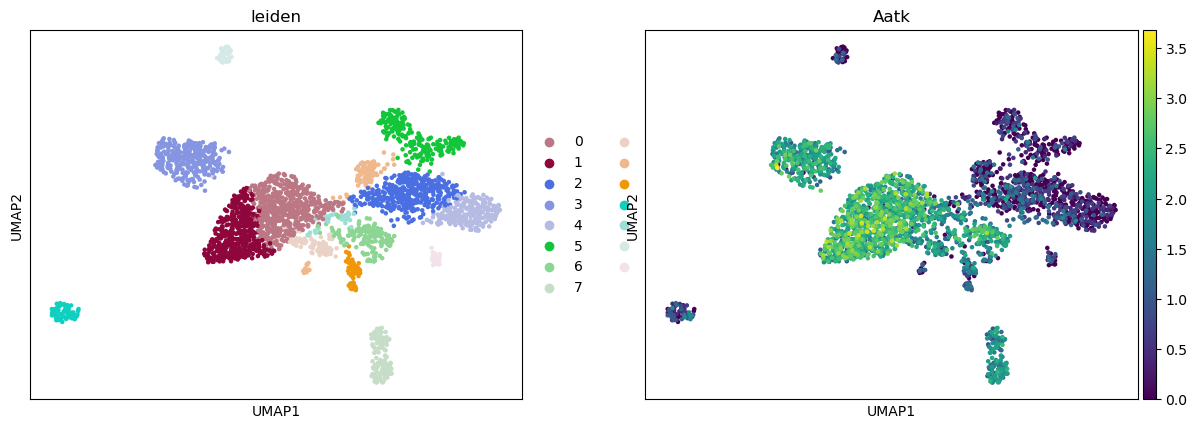

In [55]:
sc.pl.umap(adata_no_neuron,color=['leiden','Aatk'],layer='log1p')

[Executed on 2023-09-21 15:38:28.650015]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


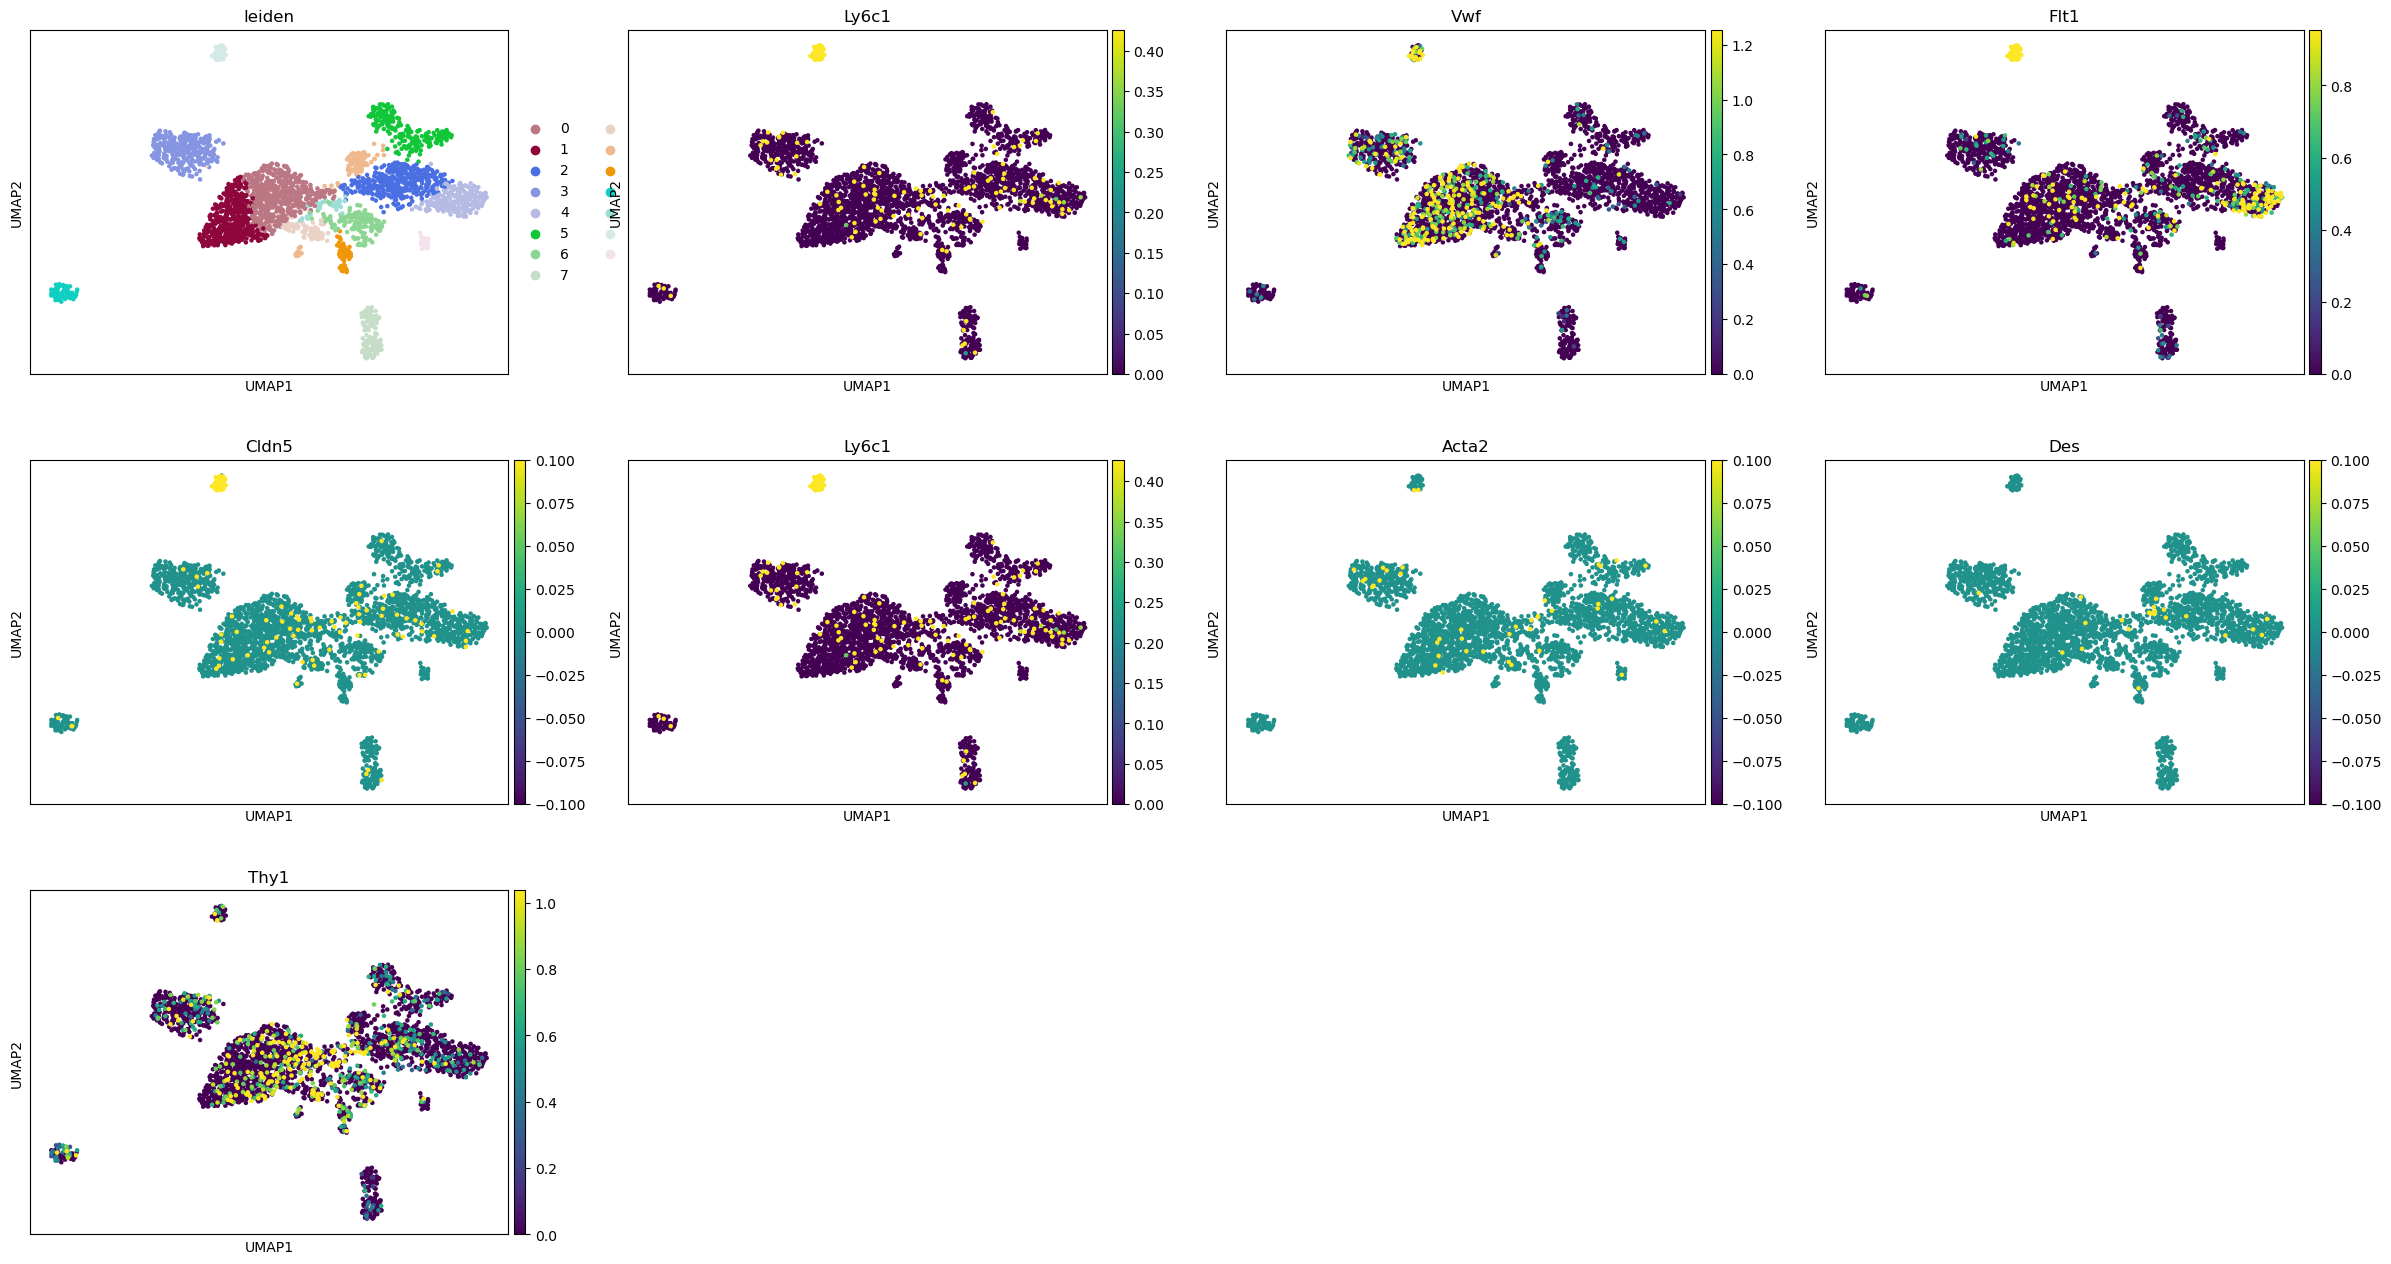

In [62]:
sc.pl.umap(adata_no_neuron,color=['leiden','Ly6c1','Vwf','Flt1','Cldn5','Ly6c1','Acta2','Des','Thy1'],layer='log1p',vmax='p95')